# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 563


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | college
Processing Record 2 of Set 1 | ixtapa
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | nogliki
Processing Record 6 of Set 1 | suva
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | jidong
Processing Record 9 of Set 1 | labytnangi
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | ajdabiya
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | barbacoas
Processing Record 15 of Set 1 | manokwari
Processing Record 16 of Set 1 | chui
Processing Record 17 of Set 1 | suntar
Processing Record 18 of Set 1 | alotau
City not found. Skipping...
Processing Record 19 of Set 1 | bama
Processing Record 20 of Set 1 | greymouth
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | longyearbyen
Processi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          536
Lat           536
Lng           536
Max Temp      536
Humidity      536
Cloudiness    536
Wind Speed    536
Country       536
Date          536
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,4.97,45,20,2.06,US,1682471206
1,ixtapa,20.7000,-105.2000,25.13,78,75,3.60,MX,1682471206
2,bethel,41.3712,-73.4140,10.92,65,0,2.06,US,1682471024
3,hawaiian paradise park,19.5933,-154.9731,27.73,69,0,5.66,US,1682471206
4,nogliki,51.8333,143.1667,2.47,86,100,5.97,RU,1682471207


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,4.97,45,20,2.06,US,1682471206
1,ixtapa,20.7000,-105.2000,25.13,78,75,3.60,MX,1682471206
2,bethel,41.3712,-73.4140,10.92,65,0,2.06,US,1682471024
3,hawaiian paradise park,19.5933,-154.9731,27.73,69,0,5.66,US,1682471206
4,nogliki,51.8333,143.1667,2.47,86,100,5.97,RU,1682471207


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

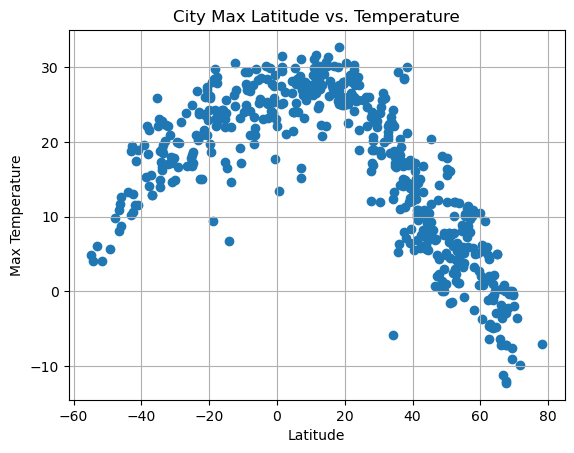

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

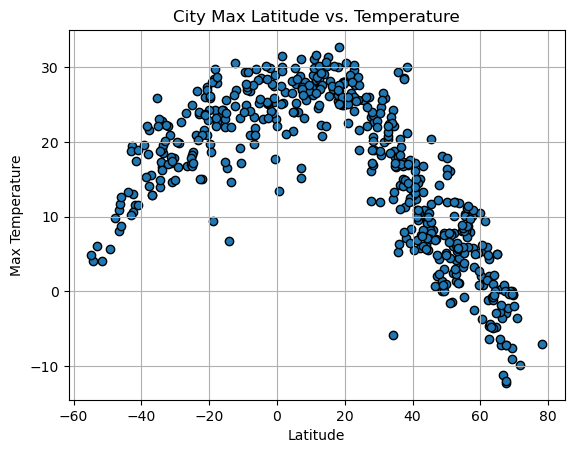

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

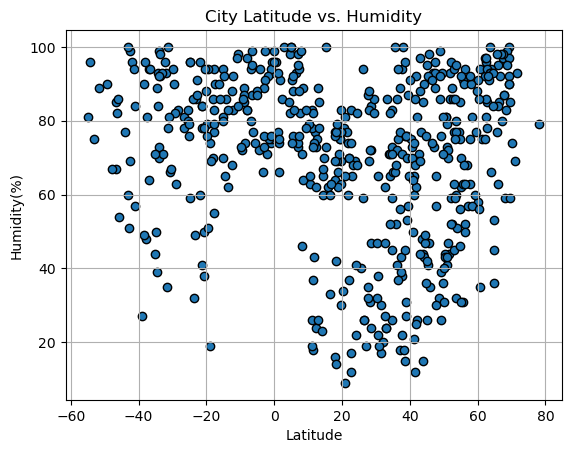

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

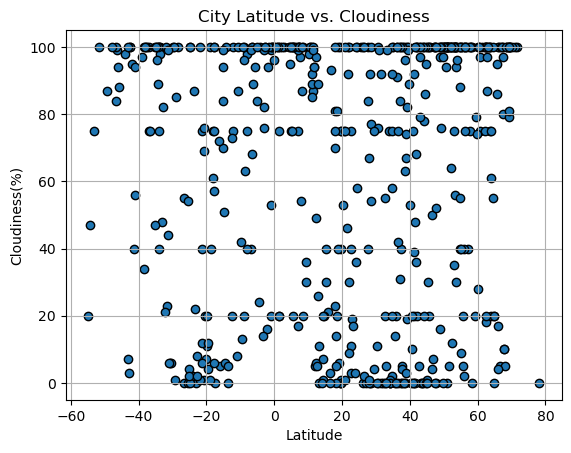

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

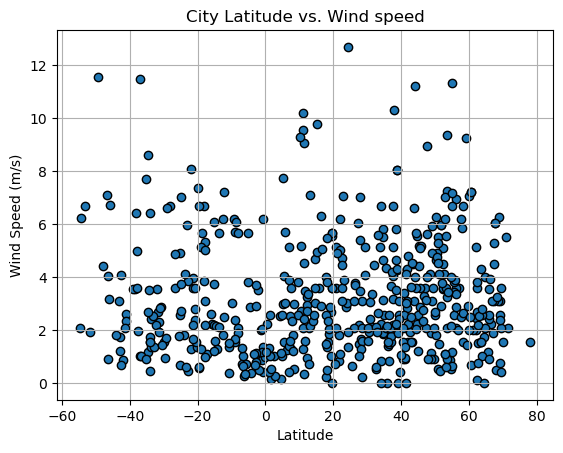

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg(x_value,y_value,x_cord,y_cord):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_value,y_value)
    regress_values = x_value*slope+intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_cord,y_cord),fontsize=15,color='red')
    plt.plot(x_value,regress_values,'r-')
    print(f"The R Squared value is {rvalue**2}.")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,college,64.8569,-147.8028,4.97,45,20,2.06,US,1682471206
1,ixtapa,20.7000,-105.2000,25.13,78,75,3.60,MX,1682471206
2,bethel,41.3712,-73.4140,10.92,65,0,2.06,US,1682471024
3,hawaiian paradise park,19.5933,-154.9731,27.73,69,0,5.66,US,1682471206
4,nogliki,51.8333,143.1667,2.47,86,100,5.97,RU,1682471207


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,suva,-18.1416,178.4415,29.71,70,75,6.69,FJ,1682471207
6,avarua,-21.2078,-159.7750,26.03,78,75,3.60,CK,1682471061
11,port-aux-francais,-49.3500,70.2167,5.59,90,87,11.55,TF,1682471048
14,manokwari,-0.8667,134.0833,27.50,74,99,0.87,ID,1682471209
15,chui,-33.6971,-53.4616,18.51,92,100,2.41,UY,1682471209


###  Temperature vs. Latitude Linear Regression Plot

The R Squared value is 0.7994277741688655.


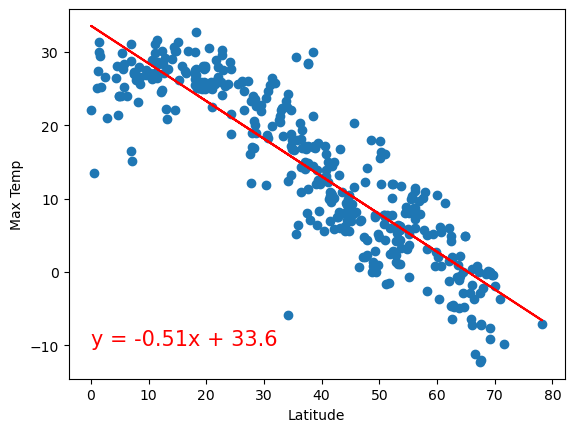

In [16]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],0,-10)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The R Squared value is 0.544267942249659.


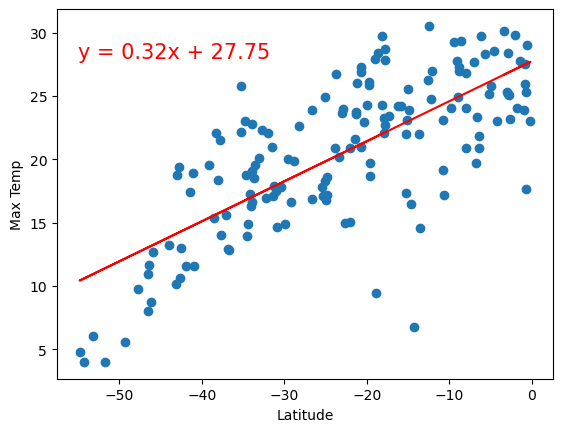

In [17]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],-55,28)
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** The relationship above shows a positive correlation between Latitude and Max Tempurature in the Southern Hemosphere. In simple terms that means when you increase your Latitude toward the equator your max tempurature will increase. The opposite is true for the Northern Hemosphere. It is showing a negative correlation, meaning the further you move away from the equator the lower your max tempurature will be. If we would take this relationship between the Southern and Northern Hemospheres we can see that the equator, latitude zero, is the pinicale of temperature. 

### Humidity vs. Latitude Linear Regression Plot

The R Squared value is 0.01410836838715786.


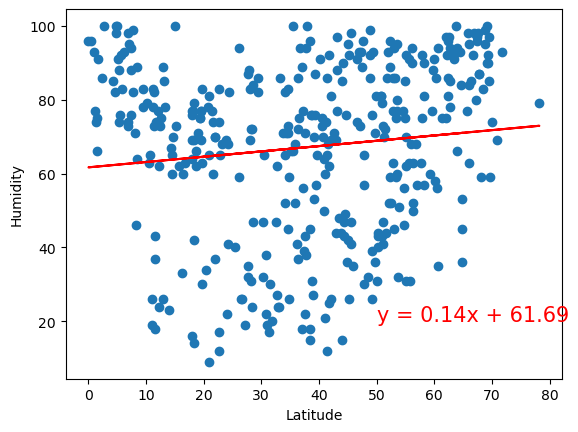

In [18]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],50,20)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The R Squared value is 0.02068612107356882.


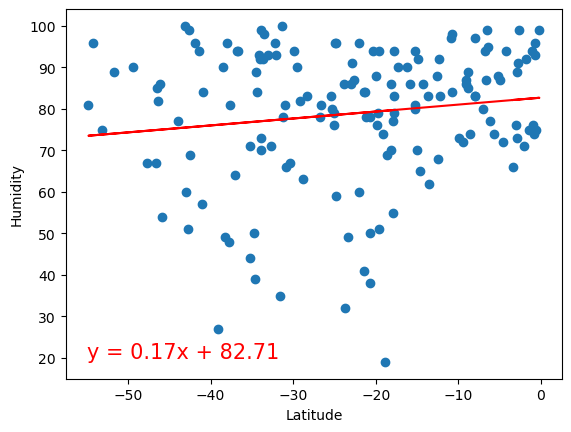

In [19]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Humidity'],-55,20)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** The data here shows us a similar set of correlation data from the previous set of charts but at a much smalller correlation. According to the data sample we have we could postulate to say that these correlations are very minimal or have very little effect on effecting one another. I believe that the data may need to be studied further due to the inconsistant R squared values the northern and southern charts are displaying. 

### Cloudiness vs. Latitude Linear Regression Plot

The R Squared value is 0.012068052749128278.


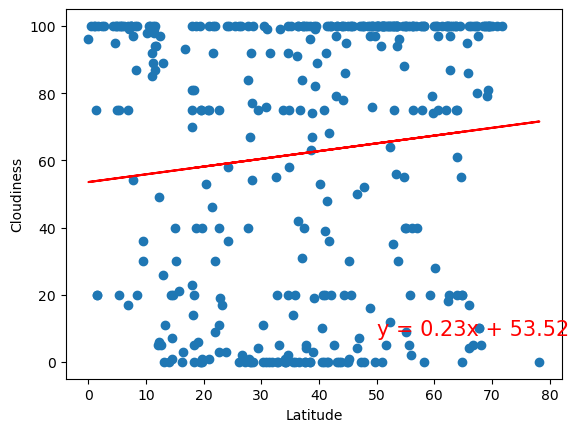

In [20]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],50,8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The R Squared value is 0.002470696019870509.


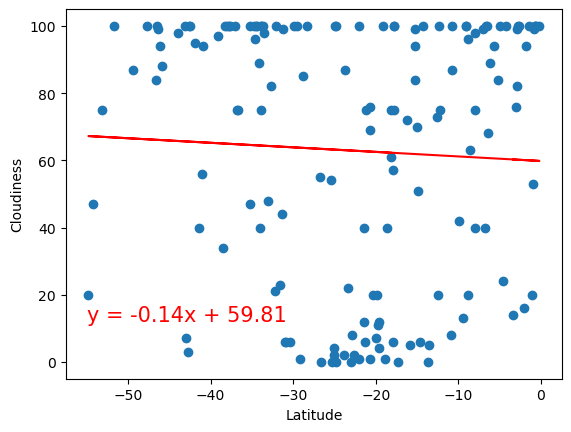

In [21]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],-55,12)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** The two charts above show that there is almost no correlation between clodiness and latitude according to the linear regression line and the R squared values we see. 

### Wind Speed vs. Latitude Linear Regression Plot

The R Squared value is 0.002781422975307261.


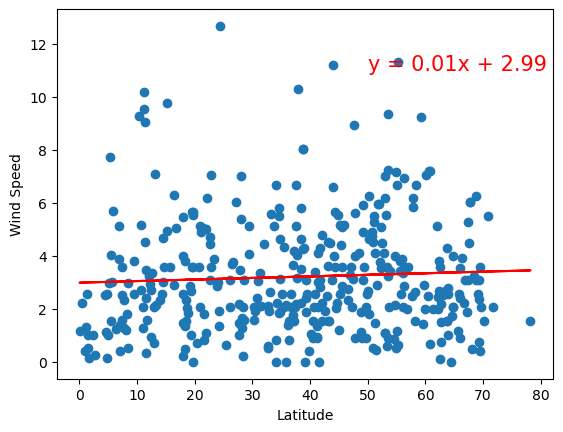

In [22]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
lin_reg(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],50,11)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The R Squared value is 0.04820522734457666.


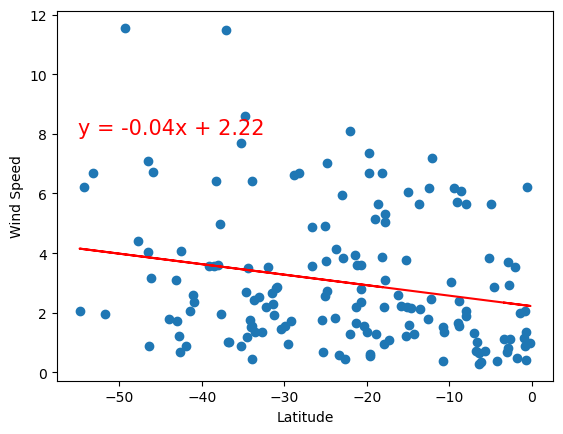

In [23]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
lin_reg(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],-55,8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** These first chart is displaying a positive correlation between latitude and wind speed in the nourthern hemosphere where as there is a negative correlation in the southern hemosphere. The correlation is very minimal but it does present itself in our sample data. This data shows that the further you get from the equator you will see an increase in wind speed.